# Esercitazione 11

In questa esercitazione l'obiettivo è quello di prendere confidenza con le reti neurali di tipo feedforward (modello Sequential della libreria Keras). Vengono quindi analizzati tre problemi di regressione lineare su dati rumorosi al fine di capire come la capacità di adattamento della rete dipenda dalla struttura della rete stessa e dai parametri che la caratterizzano.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Mostra/Nascondi celle</a>.''')

### Esercizio 11.1

Utilizzando la rete neurale lasciata come default nel notebook (costituita da un singolo neurone) iniziamo la nostra analisi variando i parametri che la costituiscono. Partiamo da  $N_{\mathrm{train}}=100$, $\sigma=0$ e $N_{\mathrm{epochs}}=30$, che indicheremo da qui in seguito come parametri di default. Con questi valori specifici la rete risulta poco efficiente e non adatta a rappresentare correttamente un modello di fit. 

    Test loss: 0.6588430404663086
    Test accuracy: 0.6588430404663086


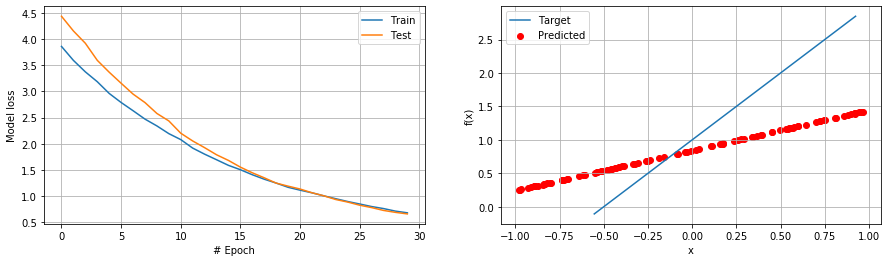

In [2]:
m = 2 
b = 1 
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b

sigma = 0.0 
y_train = np.random.normal(m * x_train + b, sigma) 
y_valid = np.random.normal(m * x_valid + b, sigma)

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30,verbose=0,shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('    Test loss:', score[0])
print('    Test accuracy:', score[1])

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Model loss')
plt.xlabel('# Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.subplot(1,2,2)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='Predicted')
plt.plot(x_valid, y_target, label='Target')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

Dunque, per prima cosa notiamo che, aumentando $N_{\mathrm{epochs}}$, il valore dei coefficienti $b$ e $m$ (i pesi della rete) si avvicina maggiormente al valore reale e con $N_{\mathrm{epochs}}=100$ si ottengono dei risultati qualitativamente accettabili.
Se invece teniamo fisso $N_{\mathrm{epochs}}$ e poniamo $N_{\mathrm{train}}=1000$, la precisione migliora notevolmente e la loss è molto più piccola rispetto a quella ottenuta aumentando $N_{\mathrm{epochs}}$. Questo risultato è ovviamente giustificato dal fatto che avendo più dati a disposizione per fare training la rete si "allena" di più nonostante il $N_{\mathrm{epochs}}$ limitato.

$N_{\mathrm{epochs}}=100$:

     Test loss: 0.004855326376855373
     Test accuracy: 0.004855326376855373


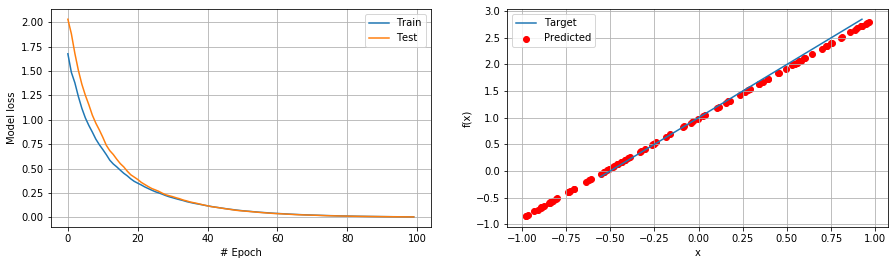

In [3]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b

sigma = 0.0 
y_train = np.random.normal(m * x_train + b, sigma) 
y_valid = np.random.normal(m * x_valid + b, sigma)

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=100,verbose=0,shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('     Test loss:', score[0])
print('     Test accuracy:', score[1])

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Model loss')
plt.xlabel('# Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.subplot(1,2,2)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='Predicted')
plt.plot(x_valid, y_target, label='Target')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

$N_{\mathrm{train}}=1000$:

     Test loss: 1.1014056326530408e-05
     Test accuracy: 1.1014056326530408e-05


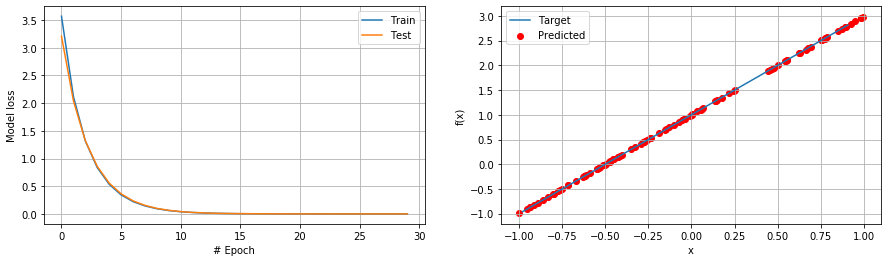

In [4]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b

sigma = 0.0 
y_train = np.random.normal(m * x_train + b, sigma) 
y_valid = np.random.normal(m * x_valid + b, sigma)

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30,verbose=0,shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('     Test loss:', score[0])
print('     Test accuracy:', score[1])

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])#,label='Train')
plt.plot(history.history['val_loss'])#,label='Test')
plt.ylabel('Model loss')
plt.xlabel('# Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.subplot(1,2,2)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='Predicted')
plt.plot(x_valid, y_target, label='Target')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

Infine andiamo ad osservare cosa succede aggiungendo del rumore ai dati di training nel caso in cui  $N_{\mathrm{train}}$ e $N_{\mathrm{epochs}}$ sono uguali ai valori di default. Per $\sigma=0.2$ i risultati migliorano, il che significa che l'introduzione di rumore nei dati iniziali può essere un fattore che contribuisce al miglioramento dell'adattamento della rete a dati nuovi. Notiamo che in questo caso la loss per i dati di validazione rimane alta, ma ciò è giustificato dal fatto che la rete non riproduce il rumore introdotto sui dati, il che è assolutamente una caratteristica da evitare, poichè si andrebbe incontro ad un overfitting dei dati.

     Test loss: 0.10253574699163437
     Test accuracy: 0.10253574699163437
     Test loss (with noise): 0.022302035242319107
     Test accuracy (with noise): 0.022302035242319107


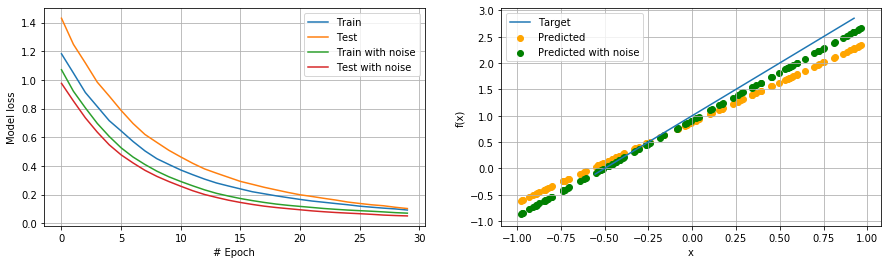

In [5]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b

sigma = 0.0
y_train = np.random.normal(m * x_train + b, sigma) 
y_valid = np.random.normal(m * x_valid + b, sigma)

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30,verbose=0,shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('     Test loss:', score[0])
print('     Test accuracy:', score[1])

np.random.seed(0)
x_train1 = np.random.uniform(-1, 1, 100)
x_valid1 = np.random.uniform(-1, 1, 10)
x_valid1.sort()
y_target1 = m * x_valid1 + b

sigma1 = 0.2
y_train1 = np.random.normal(m * x_train1 + b, sigma1) 
y_valid1 = np.random.normal(m * x_valid1 + b, sigma1)

model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,)))
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history1 = model1.fit(x=x_train1, y=y_train1, batch_size=32, epochs=30,verbose=0,shuffle=True, validation_data=(x_valid1, y_valid1))
score1 = model1.evaluate(x_valid1, y_target1, batch_size=32, verbose=0)
print('     Test loss (with noise):', score1[0])
print('     Test accuracy (with noise):', score1[1])

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.plot(history1.history['loss'],label='Train with noise')
plt.plot(history1.history['val_loss'],label='Test with noise')
plt.ylabel('Model loss')
plt.xlabel('# Epoch')
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
y_predicted1 = model1.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='orange', label='Predicted')
plt.scatter(x_predicted, y_predicted1,color='g', label='Predicted with noise')
plt.plot(x_valid, y_target, label='Target')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

### Esercizio 11.2


Estendiamo ora il modello per ottenere un adattamento ragionevole al seguente polinomio di terzo grado:

$$
f(x)=3x^3-2x^2-3x+4
$$
per $x \in [-1,1]$.

Costruiamo a tal riguardo una rete più complessa di quella utilizzata precedentemente sebbene in base al **teorema di approssimazione universale** non sarebbe necessario. Infatti esso afferma che utilizzando un singolo hidden layer arbitrariamente grande, con funzioni di attivazione del tipo s-shaped (ad esempio tanh()), la rete neurale può approssimare qualsiasi funzione continua su un intervallo compatto.

In [14]:
#Ideal parameters:
a= 3
b=-2
c=-3
d= 4

#Training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 1000)
x_valid.sort()
y_target = a*x_valid**3 + b*x_valid**2 + c*x_valid + d    #ideal target polynomial function

sigma = 0.02
y_train = np.random.normal(a*x_train**3 + b*x_train**2 + c*x_train + d, sigma) 
y_valid = np.random.normal(a*x_valid**3 + b*x_valid**2 + c*x_valid + d, sigma)

#Plot validation and target dataset
#plt.figure(figsize=(9,4))
#plt.plot(x_valid, y_target, label='target',linewidth=2.5, color='darkblue')
#plt.scatter(x_valid, y_valid, color='r', label='validation data', s=10,alpha=0.7)
#plt.legend()
#plt.xlabel('x')
#plt.ylabel('f(x)')
#plt.grid(True)
#plt.show()


In [15]:
model = tf.keras.Sequential()
model.add(Dense(units=8, input_shape=(1,), activation='linear'))
model.add(Dense(units=16, activation='elu'))
model.add(Dense(units=64, activation='selu'))
model.add(Dense(units=16, activation='elu'))
model.add(Dense(units=1, activation='linear'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 8)                 16        
_________________________________________________________________
dense_15 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_17 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(x=x_train, y=y_train,batch_size=32, epochs=50, 
                    shuffle=True,validation_data=(x_valid, y_valid), verbose=0)

Test loss: 0.0007737792329862714


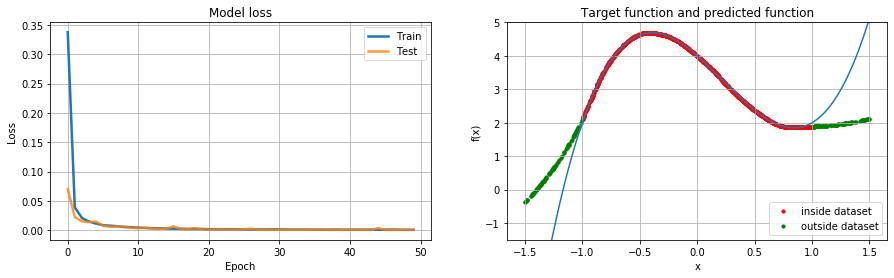

In [17]:
#Evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])

# Plot training & validation loss values
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],linewidth=2.5)
plt.plot(history.history['val_loss'],linewidth=2.5,alpha=0.8)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

x_valid = np.random.uniform(-1.5, 1.5, 1000)
x_valid.sort()
y_target = a*x_valid**3 + b*x_valid**2 + c*x_valid + d    #ideal target polynomial function

x_predicted = np.random.uniform(-1, 1, 1000)
y_predicted = model.predict(x_predicted)
x_predicted1 = np.random.uniform(-1.5, -1, 100)
y_predicted1 = model.predict(x_predicted1)
x_predicted2 = np.random.uniform(1, 1.5, 100)
y_predicted2 = model.predict(x_predicted2)

plt.subplot(1,2,2)
plt.title('Target function and predicted function')
plt.scatter(x_predicted, y_predicted,color='r',label='inside dataset',s=10)
plt.scatter(x_predicted1, y_predicted1,color='g',label='outside dataset',s=10)
plt.scatter(x_predicted2, y_predicted2,color='g',s=10)
plt.plot(x_valid, y_target)
plt.grid(True)
plt.ylim(-1.5,5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='best')

plt.show()

La rete è costituita da diversi layer fully connected con diverse funzioni di attivazione ('selu', 'elu'). Come possiamo vedere dai grafici la loss per il dataset di test è sufficientemente bassa e la predizione della rete per i dati di test all'interno dell'intervallo $[0,1]$ segue l'andamento della funzione target.
Notiamo invece che le prestazioni della rete su dati al di fuori del range su cui viene addestrata non siano buone, ma questo fatto non deve soprendere, poichè questa rete neurale sequenziale non è per costruzione pensata per previsioni al di fuori del range di addestramento.

### Exercise 11.3
  
Estendiamo ulteriormente il modello al fine di fittare la seguente funzione 2D:

$$f(x,y) = \sin(x^2+y^2)$$ per $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

Vengono cambiati sia il numero di neuroni per layer sia le funzioni di attivazione mentre l'ultimo layer rimane composto da un neurone con funzione di attivazione lineare.

In [10]:
#Generate training inputs
np.random.seed(0)
x_train = np.zeros((10000,2))
x_train[:,0] = np.random.uniform(-1.5, 1.5, 10000)
x_train[:,1] = np.random.uniform(-1.5, 1.5, 10000)

x_valid = np.zeros((1000,2))
x_valid[:,0] = np.random.uniform(-1.5, 1.5, 1000)
x_valid[:,1] = np.random.uniform(-1.5, 1.5, 1000)

z_target = np.sin(x_valid[:,0]**2 + x_valid[:,1]**2) #Ideal (target) function

sigma = 0.01
z_train = np.random.normal(np.sin(x_train[:,0]**2 + x_train[:,1]**2), sigma) 
z_valid = np.random.normal(np.sin(x_valid[:,0]**2 + x_valid[:,1]**2), sigma)

In [11]:
model1 = tf.keras.Sequential()
model1.add(Dense(units=32, input_shape=(2,), activation='linear'))
model1.add(Dense(units=128, activation='tanh'))
model1.add(Dense(units=128, activation='relu'))
model1.add(Dense(units=1, activation='linear'))

# compile the model choosing optimizer, loss and metrics objects
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_11 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 20,961
Trainable params: 20,961
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model1.fit(x_train,z_train,batch_size=32, epochs=100,shuffle=True,validation_data=(x_valid,z_valid), verbose=0)

      Test loss: 0.0005006474093534052


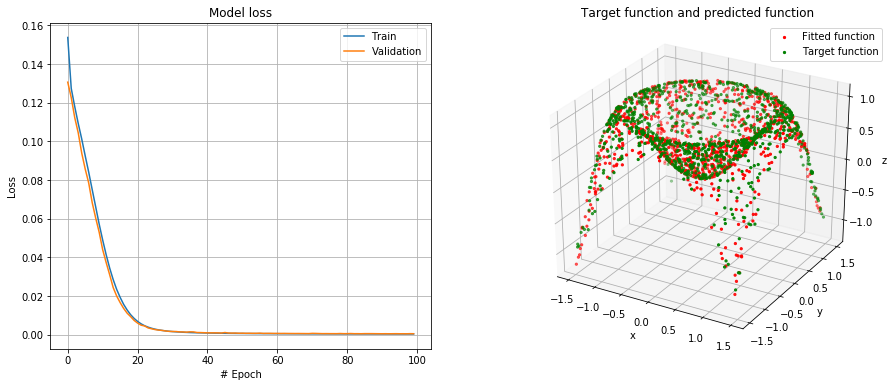

In [13]:
score = model1.evaluate(x_valid, z_valid, batch_size=32, verbose=0)
print('      Test loss:', score[0])

fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.title.set_text('Model loss')
ax.set_xlabel('# Epoch')
ax.set_ylabel('Loss')
ax.legend(['Train', 'Validation'], loc='best')
ax.grid(True)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.title.set_text('Target function and predicted function')
x_pred = np.zeros((1000, 2))
x_pred [:,0] = np.random.uniform(-1.5, 1.5, 1000)
x_pred [:,1] = np.random.uniform(-1.5, 1.5, 1000)
z_pred = model1.predict(x_pred)
ax.scatter(x_pred[:,0], x_pred[:,1], z_pred,c='r', marker='.', label='Fitted function')
ax.scatter(x_valid[:,0], x_valid[:,1], z_target, c='g', marker='.', label='Target function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc=0)
ax.grid(True)
plt.show()

In base alla rete neurale sopra scelta siamo riusciti ad approssimare la funzione bidimensionale in modo soddisfacente, come viene mostrato nei grafici della loss e del fit.